<a href="https://colab.research.google.com/github/antoniogss/subtitles_extractor/blob/main/extracao_legendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

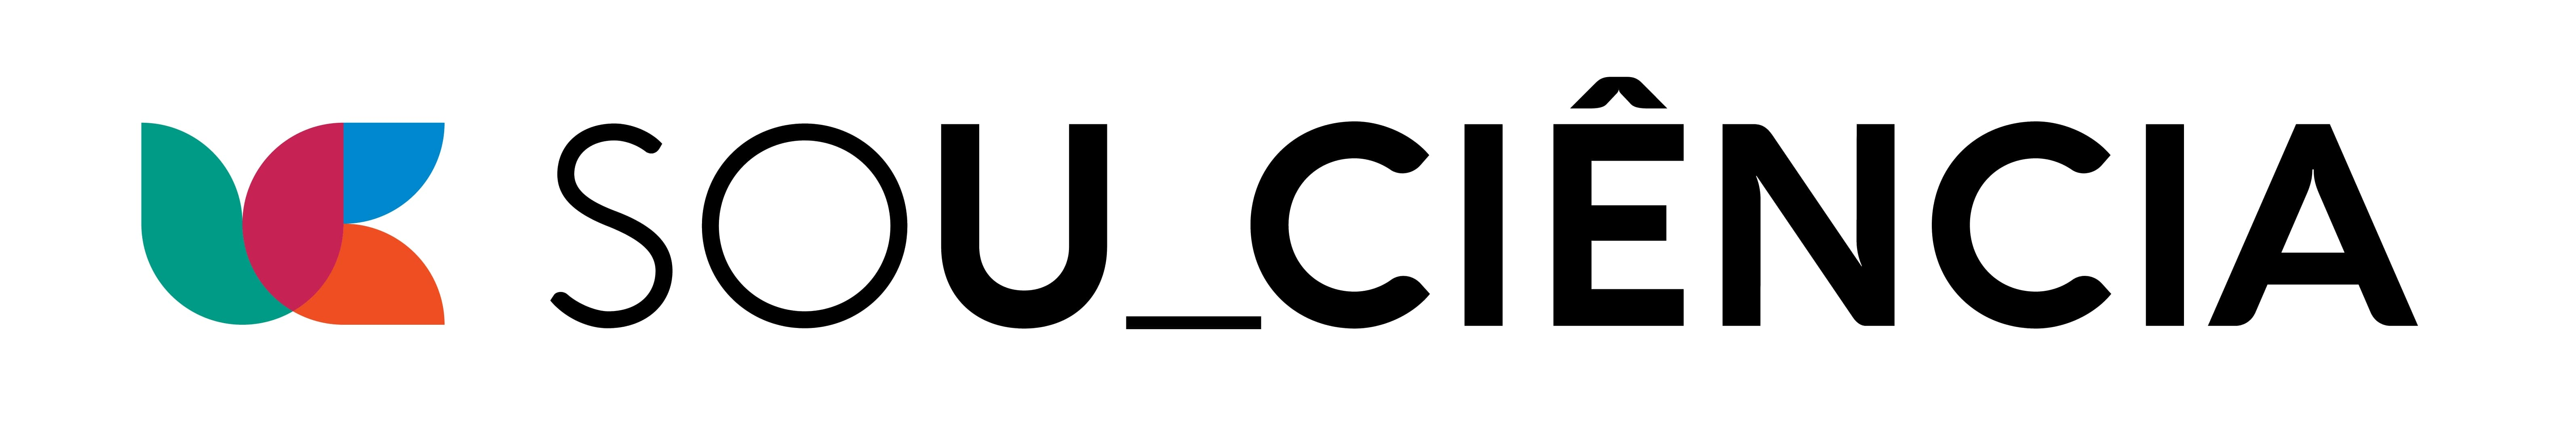

# Descrição

Desenvolvimento de um script Python para extração dos metadados e legendas (em português) de vídeos do YouTube recursivamente. Os links dos vídeos foram disponibilizados via tabela do Google Planilhas e o arquivo final, com o resultado da extração de dados, está no formato JSON.

Autor: Antonio Guerreiro Silva Serrano

Pesquisador de Apoio Técnico

07-06-2023

In [14]:
# Bibliotecas já instaladas

import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as 

# Arquivo JSON
import re
import json

# Tabela do Google Planilhas
from google.colab import auth
import gspread
from google.auth import default

# Função check_and_install_libraries
import importlib 
import subprocess 
import os 

In [13]:
# Bibliotecas que precisam de instalação

# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

def check_and_install_libraries(library_list):
    for library in library_list:
        try:
            importlib.import_module(library)
            print(GREEN_COLOR + f"{library} já está instalado." + END_COLOR)
        except ImportError:
            try:
                with open(os.devnull, 'w') as devnull:
                    subprocess.check_call(['pip', 'install', library], stdout=devnull, stderr=subprocess.STDOUT)
                print(GREEN_COLOR + f"{library} instalado com sucesso!." + END_COLOR)
            except Exception as e:
                print(f"Erro ao instalar {library}: {str(e)}")
        except Exception as e:
            print(f"Erro ao importar {library}: {str(e)}")

# Lista de bibliotecas para verificar e instalar
libraries = [
             'youtube-transcript-api', 
             'py-youtube',
             'unidecode'
             ]

check_and_install_libraries(libraries)

youtube-transcript-api instalado com sucesso!.
py-youtube instalado com sucesso!.
unidecode já está instalado.


In [3]:
# Importação de bibliotecas e módulos após a instalação

from py_youtube import Data # Extração dos metadados
from youtube_transcript_api import YouTubeTranscriptApi as yt # Extração da legenda
from youtube_transcript_api.formatters import JSONFormatter # Formatação do arquivo JSON
from unidecode import unidecode # Remoção de acentos ortográficos do texto

# Testando as bibliotecas isoladamente

In [4]:
url = "https://www.youtube.com/watch?v=XRnwfN6rQMQ"

metadados = Data(url).data()

type(metadados)

dict

In [5]:
# Imprimir o dicionário no formato vertical
for key, value in metadados.items():
    print(key, ":", value)

id : XRnwfN6rQMQ
title : COMO VAI SER NA VELHICE 😱 - Já imaginaram como viverão aos 80?
thumbnails : https://i.ytimg.com/vi/XRnwfN6rQMQ/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG\u0026rs=AOn4CLDIFWh6Ei1MXmW9eIKK2LO7LyjZsw
views : 11934
likes : 2,049
dislikes : None
publishdate : 2020-03-28
category : People \u0026 Blogs
channel_name : Bee40tona
subscriber : 68K
keywords : autoestima, velhice, lgbt, solidão, futuro


In [6]:
video_id = "XRnwfN6rQMQ"

legenda = yt.get_transcript(video_id, languages=['pt'])

type(legenda)

list

In [7]:
count = 0
for item in legenda:
    if count < 6:
        print(item)
        count += 1
    else:
        break

{'text': 'e quando eu sair de casa aí eu saí para', 'start': 0.0, 'duration': 4.08}
{'text': 'morar sozinho eu não saio nem para outra', 'start': 2.07, 'duration': 3.479}
{'text': 'cidade eu sair para outro bairro sair da', 'start': 4.08, 'duration': 2.61}
{'text': 'casa da minha mãe que era no bairro sair', 'start': 5.549, 'duration': 2.401}
{'text': 'para outro bairro e o grande', 'start': 6.69, 'duration': 2.909}
{'text': 'questionamento dela ela vai ficar', 'start': 7.95, 'duration': 3.6}


# Testando as bibliotecas integradas

In [50]:
url = "https://www.youtube.com/watch?v=XRnwfN6rQMQ"

# Extrair o video_id da URL usando expressões regulares
match = re.search(r"v=([^&]+)", url)
if match:
    video_id = match.group(1)
else:
    video_id = None

# Obter metadados usando a classe Data 
metadados = Data(url).data()

# Obter a legenda usando o YouTubeTranscriptApi
transcript = yt.get_transcript(video_id, languages=['pt'])

# Remover acentos do texto da legenda
corrected_transcript = []
for segment in transcript:
    text = segment['text']
    # Remover sinais diacríticos (acentos) do texto
    text = unidecode(text)
    # Adicionar o texto corrigido à legenda_corrigida
    corrected_transcript.append({'text': text, 'start': segment['start'], 'duration': segment['duration']})

# Criar um dicionário para armazenar tanto os metadados quanto a legenda
combined_data = {
    "url" : url,
    "metadados": metadados,
    "legenda": corrected_transcript
}

# Escrever o dicionário dados_combinados em um arquivo JSON
with open('video_1_legendas.json', 'w', encoding='utf-8') as json_file:
    json.dump(combined_data, json_file, ensure_ascii=False)

# Exibir os dados JSON com indentação
print(json.dumps(combined_data, indent=4, ensure_ascii=False))

{
    "url": "https://www.youtube.com/watch?v=XRnwfN6rQMQ",
    "metadados": {
        "id": "XRnwfN6rQMQ",
        "title": "COMO VAI SER NA VELHICE 😱 - Já imaginaram como viverão aos 80?",
        "thumbnails": "https://i.ytimg.com/vi/XRnwfN6rQMQ/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG\\u0026rs=AOn4CLDIFWh6Ei1MXmW9eIKK2LO7LyjZsw",
        "views": "11934",
        "likes": "2,049",
        "dislikes": null,
        "publishdate": "2020-03-28",
        "category": "People \\u0026 Blogs",
        "channel_name": "Bee40tona",
        "subscriber": "68K",
        "keywords": "autoestima, velhice, lgbt, solidão, futuro"
    },
    "legenda": [
        {
            "text": "e quando eu sair de casa ai eu sai para",
            "start": 0.0,
            "duration": 4.08
        },
        {
            "text": "morar sozinho eu nao saio nem para outra",
            "start": 2.07,
            "duration": 3.479
        },
        {
            "text": "cidade eu sair p

# Extraindo as legendas de uma tabela de links

In [10]:
# Integração com o Google Dive

gc.drive.mount('/content/drive')
               
gc.output.clear()

In [11]:
# Definindo o diretório de trabalho

%cd ./drive/MyDrive/SoU_Ciencia/mapa_necrossistema/

/content/drive/MyDrive/SoU_Ciencia/mapa_necrossistema


In [19]:
# Autentificação de usuário Google

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

In [31]:
# Indicando a tabela com os links
worksheet = gc.open('links_youtube').sheet1

# Obtendo todos os valores das linhas
rows = worksheet.get_all_values()

# Convertendo para o formato de dataframe
df = pd.DataFrame(rows[1:], columns=rows[0])

In [32]:
df.head()

,data_inclusao,url
0,07-06-2023,https://www.youtube.com/watch?v=XRnwfN6rQMQ
1,07-06-2023,https://www.youtube.com/watch?v=JNrbOqT8w_0
2,07-06-2023,https://www.youtube.com/watch?v=gbAKLd8L9W4
3,07-06-2023,https://www.youtube.com/watch?v=ylFDwcDTL0g
4,07-06-2023,https://www.youtube.com/watch?v=T28k2ODYJfE


In [64]:
# Lista de URLs
urls = df['url'].tolist()

for url in urls:
    # Extrair o video_id da URL usando expressões regulares
    match = re.search(r"v=([^&]+)", url)
    if match:
        video_id = match.group(1)
    else:
        video_id = None

    # Obter as legendas disponíveis usando o YouTubeTranscriptApi
    available_transcripts = yt.list_transcripts(video_id)

    # Exibir as legendas disponíveis para a URL
    print("URL:", url)
    for transcript in available_transcripts:
        print("Language:", transcript.language)
        print("Language Code:", transcript.language_code)
        print("Is Generated:", transcript.is_generated)
        print("Is Translatable:", transcript.is_translatable)
        print("---------------------------------------------")

URL: https://www.youtube.com/watch?v=XRnwfN6rQMQ
Language: Portuguese (auto-generated)
Language Code: pt
Is Generated: True
Is Translatable: True
---------------------------------------------
URL: https://www.youtube.com/watch?v=JNrbOqT8w_0
Language: Portuguese (auto-generated)
Language Code: pt
Is Generated: True
Is Translatable: True
---------------------------------------------
URL: https://www.youtube.com/watch?v=gbAKLd8L9W4
Language: Portuguese (auto-generated)
Language Code: pt
Is Generated: True
Is Translatable: True
---------------------------------------------
URL: https://www.youtube.com/watch?v=ylFDwcDTL0g
Language: Portuguese (auto-generated)
Language Code: pt
Is Generated: True
Is Translatable: True
---------------------------------------------
URL: https://www.youtube.com/watch?v=T28k2ODYJfE
Language: English (United States)
Language Code: en-US
Is Generated: False
Is Translatable: True
---------------------------------------------
Language: Portuguese (Brazil)
Language C

In [97]:
# Lista de URLs a serem avaliadas
urls = df['url'].tolist()

# Lista vazia para armazenar os dados combinados de URL, metadados e legendas
all_combined_data = []

for url in urls:
    # Extrair o ID do vídeo da URL usando expressões regulares
    match = re.search(r"v=([^&]+)", url)
    if match:
        video_id = match.group(1)
    else:
        video_id = None

    # Obter os metadados usando a classe Data
    metadados = Data(url).data()

    # Obter a legenda usando o YouTubeTranscriptApi
    legenda = None
    try:
        legenda = yt.get_transcript(video_id, languages=['pt'])
    except:
        pass

    # Remover acentos do texto da legenda
    legenda_corrigida = []
    if legenda:
        for segmento in legenda:
            texto = segmento['text']
            # Remover diacríticos (acentos) do texto
            texto = unidecode(texto)
            # Adicionar o texto corrigido à legenda corrigida
            legenda_corrigida.append({'text': texto, 'start': segmento['start'], 'duration': segmento['duration']})

    # Criar um dicionário para armazenar a URL, metadados e legenda
    dados_combinados = {
        "url": url,
        "metadados": metadados,
        "legenda": legenda_corrigida
    }

    all_combined_data.append(dados_combinados)

# Escrever o dicionário all_combined_data em um arquivo JSON
with open('todos_videos_legendas.json', 'w', encoding='utf-8') as json_file:
    json.dump(all_combined_data, json_file, ensure_ascii=False)

# Exibir os dados JSON com indentação
print(json.dumps(all_combined_data, indent=4, ensure_ascii=False))

[
    {
        "url": "https://www.youtube.com/watch?v=XRnwfN6rQMQ",
        "metadados": {
            "id": "XRnwfN6rQMQ",
            "title": "COMO VAI SER NA VELHICE 😱 - Já imaginaram como viverão aos 80?",
            "thumbnails": "https://i.ytimg.com/vi/XRnwfN6rQMQ/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG\\u0026rs=AOn4CLDIFWh6Ei1MXmW9eIKK2LO7LyjZsw",
            "views": "11934",
            "likes": "2,049",
            "dislikes": null,
            "publishdate": "2020-03-28",
            "category": "People \\u0026 Blogs",
            "channel_name": "Bee40tona",
            "subscriber": "68K",
            "keywords": "autoestima, velhice, lgbt, solidão, futuro"
        },
        "legenda": [
            {
                "text": "e quando eu sair de casa ai eu sai para",
                "start": 0.0,
                "duration": 4.08
            },
            {
                "text": "morar sozinho eu nao saio nem para outra",
                "star

In [100]:
# Abre o arquivo JSON contendo os dados dos vídeos e legendas
with open('todos_videos_legendas.json', 'r') as json_file:
    data = json.load(json_file)

# Palavra-chave 1 a ser procurada nas legendas
keyword1 = 'casa' 

# Palavra-chave 2 a ser procurada nas legendas
keyword2 = 'mãe'

# Lista para armazenar os resultados encontrados
results = []

for item in data:
    for legenda_item in item['legenda']:
        text = legenda_item['text']
        if keyword1 in text and keyword2 in text:
            # Ambas as palavras-chave estão presentes no texto do legenda_item
            results.append((item['metadados'], text))
        
        if keyword1 in text or keyword2 in text:
            # Uma das palavras-chave está presente no texto do legenda_item
            results.append((item['metadados'], text))

# Criar um DataFrame a partir dos resultados
df_results = pd.DataFrame(results, columns=['Metadados', 'Texto'])

# Imprimir o DataFrame
df_results.head()

,Metadados,Texto
0,"{'id': 'XRnwfN6rQMQ', 'title': 'COMO VAI SER N...",e quando eu sair de casa ai eu sai para
1,"{'id': 'XRnwfN6rQMQ', 'title': 'COMO VAI SER N...",casa da minha mae que era no bairro sair
2,"{'id': 'XRnwfN6rQMQ', 'title': 'COMO VAI SER N...",sozinho voce ta saindo de casa para ir
3,"{'id': 'XRnwfN6rQMQ', 'title': 'COMO VAI SER N...",casa e a minha mae se perguntava muito e
4,"{'id': 'XRnwfN6rQMQ', 'title': 'COMO VAI SER N...",casamento familia adocao de filhos de
